In [393]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("twt_#ifc.csv")
# above line will be different depending on where you saved your data, and your file name
df.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score
0,whi wait get fine govern take care wear mask m...,6,2315,0,Mon Jun 01 12:56:02 +0000 2020,0.125,0.375,-1
1,start monday delhi govern gave relax lockdown ...,1,121,0,Mon Jun 01 12:30:05 +0000 2020,0.125,0.500,-1
2,not meme just inform lockdown look like,0,2,1,Mon Jun 01 12:14:42 +0000 2020,0.000,0.625,-1
3,with lockdown focu reviv economi howev team vi...,9,42,0,Mon Jun 01 12:06:29 +0000 2020,0.375,0.500,-1
4,hello guy video get look sonam kapoor celebr i...,0,3,0,Mon Jun 01 11:54:15 +0000 2020,0.000,0.625,-1


Data Preparation

In [405]:
df.sent_score.value_counts()


 1    944
-1    576
 0    229
Name: sent_score, dtype: int64

In [395]:
df.drop(['retweet_count','user_followers_count','favorite_count','created_at','pos_score','neg_score'],axis=1,inplace=True)


In [408]:
df.info

<bound method DataFrame.info of                                               full_text  sent_score  \
0     whi wait get fine govern take care wear mask m...          -1   
1     start monday delhi govern gave relax lockdown ...          -1   
2               not meme just inform lockdown look like          -1   
3     with lockdown focu reviv economi howev team vi...          -1   
4     hello guy video get look sonam kapoor celebr i...          -1   
...                                                 ...         ...   
1744  fuck gdp fuck corona fuck covid fuck economi f...          -1   
1745  lost job lost food lost shelter lost life coro...           0   
1746  So miss dubai wish dubai seem rainbow heavi ra...          -1   
1747  some basic hygien go long way fight corona tho...           1   
1748  never pretend know noth you pretend microorgan...          -1   

      pre_clean_len  
0                85  
1                65  
2                39  
3                81  
4    

In [396]:
df[df.sent_score == -1].head(5)


,full_text,sent_score
0,whi wait get fine govern take care wear mask m...,-1
1,start monday delhi govern gave relax lockdown ...,-1
2,not meme just inform lockdown look like,-1
3,with lockdown focu reviv economi howev team vi...,-1
4,hello guy video get look sonam kapoor celebr i...,-1


In [397]:
df['pre_clean_len'] = [len(t) for t in df.full_text]


In [398]:
from pprint import pprint
data_dict = {
    'sent_score':{
        'type':df.sent_score.dtype,
        'description':'sentiment class - 0:negative, 1:positive,-1:neutral'
    },
    'full_text':{
        'type':df.full_text.dtype,
        'description':'tweet full_text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1749, 3),
 'full_text': {'description': 'tweet full_text', 'type': dtype('O')},
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sent_score': {'description': 'sentiment class - 0:negative, '
                               '1:positive,-1:neutral',
                'type': dtype('int64')}}


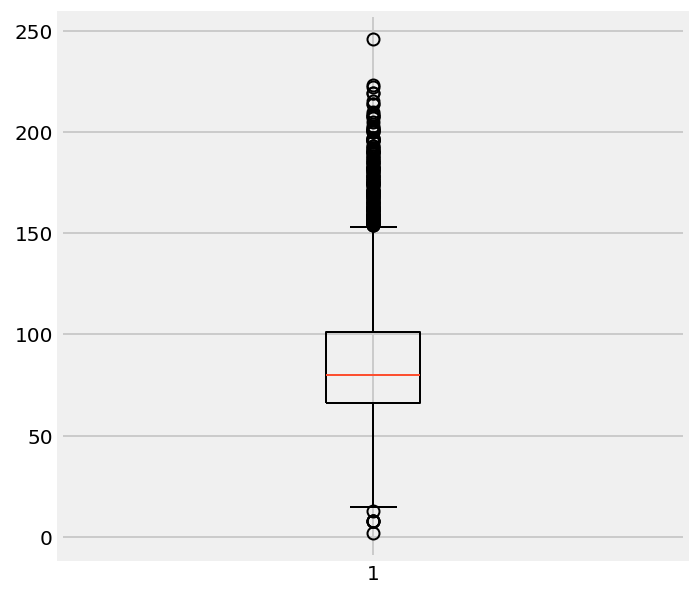

In [399]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [400]:
df[df.pre_clean_len > 140].head(10)


,full_text,sent_score,pre_clean_len
7,We readi lockdown commit amp prepar distribut ...,-1,201
8,start monday delhi govern gave relax lockdown ...,-1,141
9,start monday delhi govern gave relax lockdown ...,-1,141
11,As per order date No state deviat lockdown gui...,1,156
13,keep distanc inde good way stay safe trucker t...,1,167
17,guidelin issu ministri home affair say lockdow...,-1,157
21,lockdown unlock guidelin chiefministercaptamar...,0,222
38,part the guidelin come effect june amp effect ...,1,180
42,ajasthan CM A gehlot As lockdown begin today n...,1,208
60,endors centr lockdown plan signific eas curb u...,1,147


In [401]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(full_text):
    soup = BeautifulSoup(full_text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.full_text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['whi wait get fine govern take care wear mask maintain social distanc facemask lockdow',
 'start monday delhi govern gave relax lockdown howev educ institut',
 'not meme just inform lockdown look like',
 'with lockdown focu reviv economi howev team vijaykarnataka alreadi stimul economi',
 'hello guy video get look sonam kapoor celebr inspir look priya inturu lockdown unlock priyainturu fashion trend corona covid',
 'live cabinet brief union minist prakash javadekar nitin gadkari amp narend june narendramodi pmmodi lockdown unlock watch video here',
 'we readi lockdown commit amp prepar distribut essenti mani needi peopl toda',
 'we readi lockdown commit amp prepar distribut essenti mani needi peopl today sector chandigarh social worker smt veena singla inner wheel club central amp sh dharamvir chairman sc cell ctcc wehelppeopl',
 'start monday delhi govern gave relax lockdown howev educ institut mall gymnasium swim pool metro place worship continu bar citi lockdownindia',
 'start mond

In [409]:
nums = [0,1748]


In [410]:

%%time
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%100 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[1] )   )                                                                 
    clean_tweet_texts.append(tweet_cleaner(df['full_text'][i]))

Cleaning and parsing the tweets...

Tweets 100 of 1748 has been processed
Tweets 200 of 1748 has been processed
Tweets 300 of 1748 has been processed
Tweets 400 of 1748 has been processed
Tweets 500 of 1748 has been processed
Tweets 600 of 1748 has been processed
Tweets 700 of 1748 has been processed
Tweets 800 of 1748 has been processed
Tweets 900 of 1748 has been processed
Tweets 1000 of 1748 has been processed
Tweets 1100 of 1748 has been processed
Tweets 1200 of 1748 has been processed
Tweets 1300 of 1748 has been processed
Tweets 1400 of 1748 has been processed
Tweets 1500 of 1748 has been processed
Tweets 1600 of 1748 has been processed
Tweets 1700 of 1748 has been processed
Wall time: 1.27 s


In [411]:
len(clean_tweet_texts)


1748

In [412]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['full_text'])
clean_df['sent_score'] = df.sent_score
clean_df.head()

,full_text,sent_score
0,whi wait get fine govern take care wear mask m...,-1
1,start monday delhi govern gave relax lockdown ...,-1
2,not meme just inform lockdown look like,-1
3,with lockdown focu reviv economi howev team vi...,-1
4,hello guy video get look sonam kapoor celebr i...,-1


In [413]:
clean_df.to_csv('ifc_clean_tweets.csv',encoding='utf-8')


In [414]:
csv = 'ifc_clean_tweets.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,sent_score
0,whi wait get fine govern take care wear mask m...,-1
1,start monday delhi govern gave relax lockdown ...,-1
2,not meme just inform lockdown look like,-1
3,with lockdown focu reviv economi howev team vi...,-1
4,hello guy video get look sonam kapoor celebr i...,-1


Reference:https://github.com/tthustla/twitter_sentiment_analysis_part1/blob/master/Capstone_part2.ipynb

Word Cloud


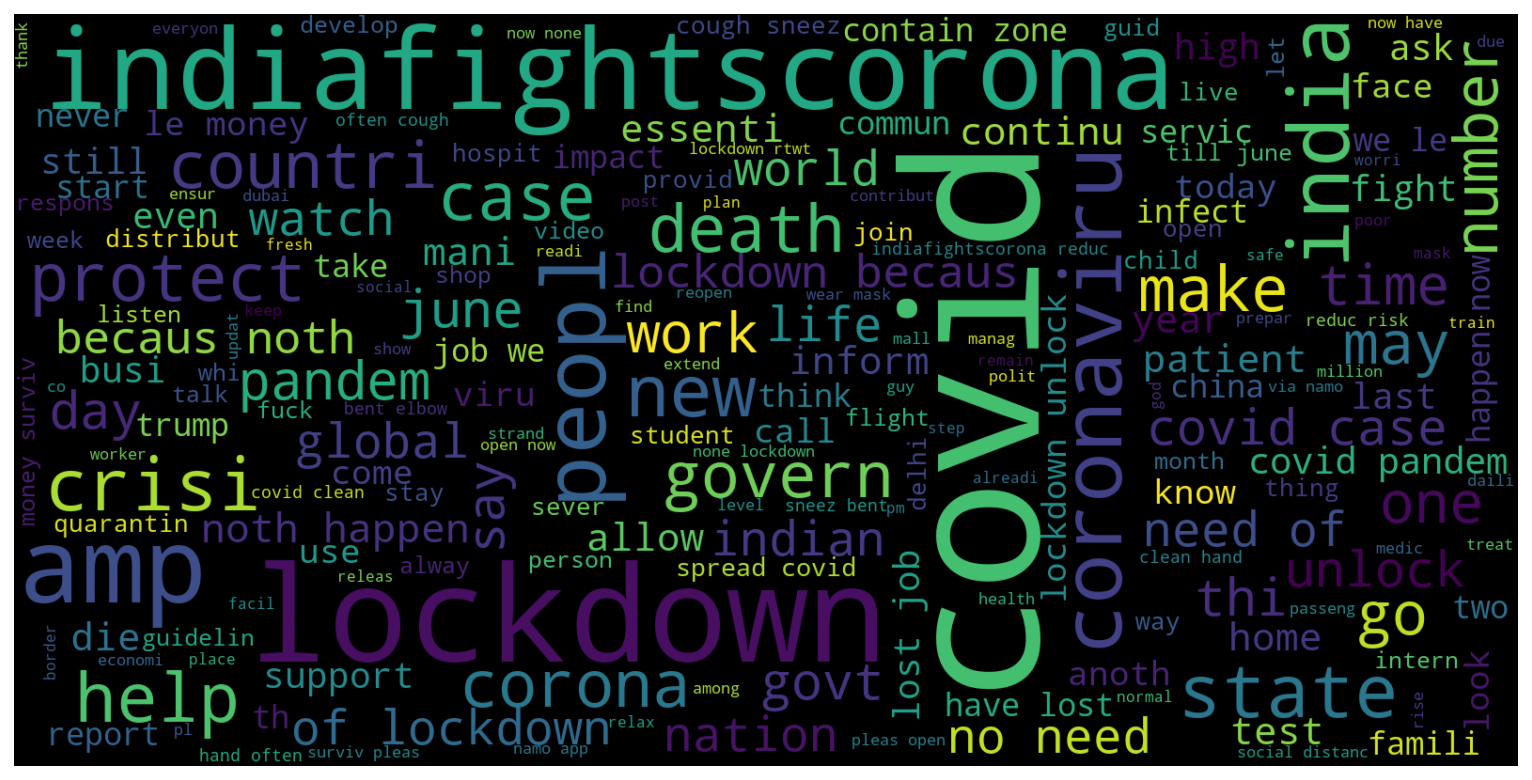

In [415]:
neg_tweets = my_df[my_df.sent_score == -1]
neg_string = []
for t in neg_tweets.full_text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

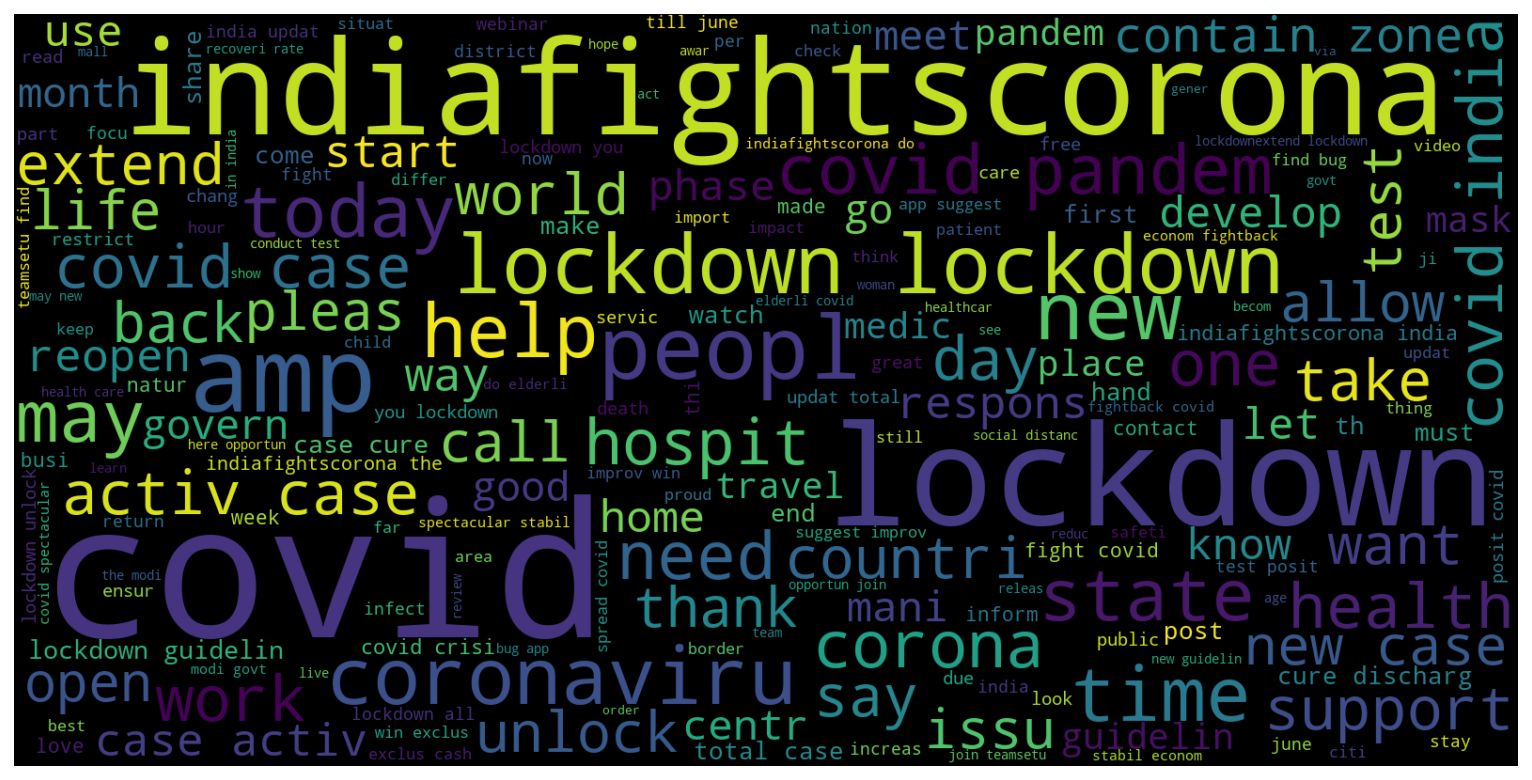

In [416]:
pos_tweets = my_df[my_df.sent_score == 1]
pos_string = []
for t in pos_tweets.full_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

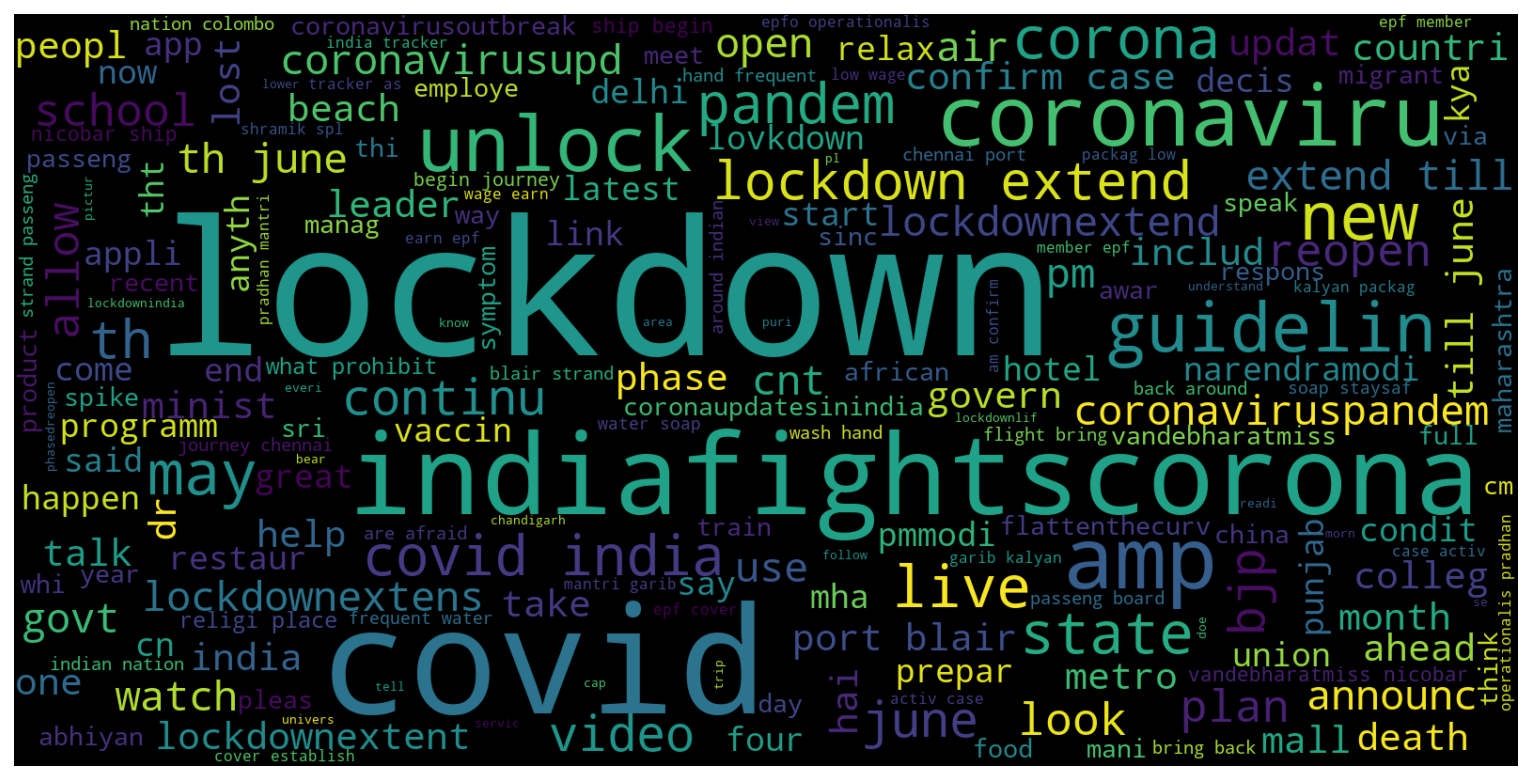

In [417]:
neu_tweets = my_df[my_df.sent_score == 0]
neu_string = []
for t in neu_tweets.full_text:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [418]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.full_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [419]:
len(cvec.get_feature_names())


5098

In [420]:
neg_doc_matrix = cvec.transform(my_df[my_df.sent_score== -1].full_text)
pos_doc_matrix = cvec.transform(my_df[my_df.sent_score == 1].full_text)
neu_doc_matrix = cvec.transform(my_df[my_df.sent_score == 0].full_text)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neu_tf = np.sum(neu_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neu = np.squeeze(np.asarray(neu_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [421]:
document_matrix = cvec.transform(my_df.full_text)
my_df[my_df.sent_score == 0].tail()


,full_text,sent_score
1715,no one talk loss suffer farmer involv horticul...,0
1723,corona j,0
1733,beachgoer rejoic dubai uae beach park beach co...,0
1740,real viru covid corona viru shootingstart pala...,0
1745,lost job lost food lost shelter lost life coro...,0


In [422]:

%%time
neg_batches = np.linspace(0,700,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-3):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

7 entries' term freuquency calculated
77 entries' term freuquency calculated
148 entries' term freuquency calculated
219 entries' term freuquency calculated
289 entries' term freuquency calculated
360 entries' term freuquency calculated
431 entries' term freuquency calculated
502 entries' term freuquency calculated
572 entries' term freuquency calculated
643 entries' term freuquency calculated
692 entries' term freuquency calculated
Wall time: 226 ms


In [423]:
%%time
pos_batches = np.linspace(700,1100,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-3):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

704 entries' term freuquency calculated
744 entries' term freuquency calculated
784 entries' term freuquency calculated
825 entries' term freuquency calculated
865 entries' term freuquency calculated
906 entries' term freuquency calculated
946 entries' term freuquency calculated
986 entries' term freuquency calculated
1027 entries' term freuquency calculated
1067 entries' term freuquency calculated
1095 entries' term freuquency calculated
Wall time: 95.7 ms


In [424]:
%%time
neu_batches = np.linspace(1100,1400,100).astype(int)
i=0
neu_tf = []
while i < len(neu_batches)-1:
    batch_result = np.sum(document_matrix[neu_batches[i]:neu_batches[i+1]].toarray(),axis=0)
    neu_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neu_batches)-2):
        print (neu_batches[i+1],"entries' term freuquency calculated")
    i += 1

1103 entries' term freuquency calculated
1133 entries' term freuquency calculated
1163 entries' term freuquency calculated
1193 entries' term freuquency calculated
1224 entries' term freuquency calculated
1254 entries' term freuquency calculated
1284 entries' term freuquency calculated
1315 entries' term freuquency calculated
1345 entries' term freuquency calculated
1375 entries' term freuquency calculated
1400 entries' term freuquency calculated
Wall time: 88.8 ms


In [426]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
neu= np.sum(neu_tf,axis=0)

term_freq_df = pd.DataFrame([neg,pos,neu],columns=cvec.get_feature_names()).transpose()
term_freq_df.head(10)

,0,1,2
aa,1,0,0
aan,1,0,0
aanfightingcorona,1,0,0
aap,1,1,0
aapn,0,1,0
aarogya,3,2,0
aarogyasetu,0,1,0
aarogyasetuapp,2,0,0
aarpaar,1,0,0
aatamnirbhar,1,0,0


In [427]:
term_freq_df.columns = ['negative', 'positive','neutral']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']+term_freq_df['neutral']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,neutral,total
covid,191,267,256,714
lockdown,637,15,15,667
indiafightscorona,198,83,2,283
india,103,39,14,156
amp,58,54,32,144
case,46,52,31,129
coronaviru,38,37,25,100
peopl,43,28,20,91
new,44,28,19,91
state,63,16,10,89


In [428]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')


Reference- https://github.com/tthustla/twitter_sentiment_analysis_part2/blob/master/Capstone_part3-Copy1.ipynb

Frequency of Token's

([<matplotlib.axis.XTick at 0x1d0307dea90>,
 <a list of 10 Text xticklabel objects>)

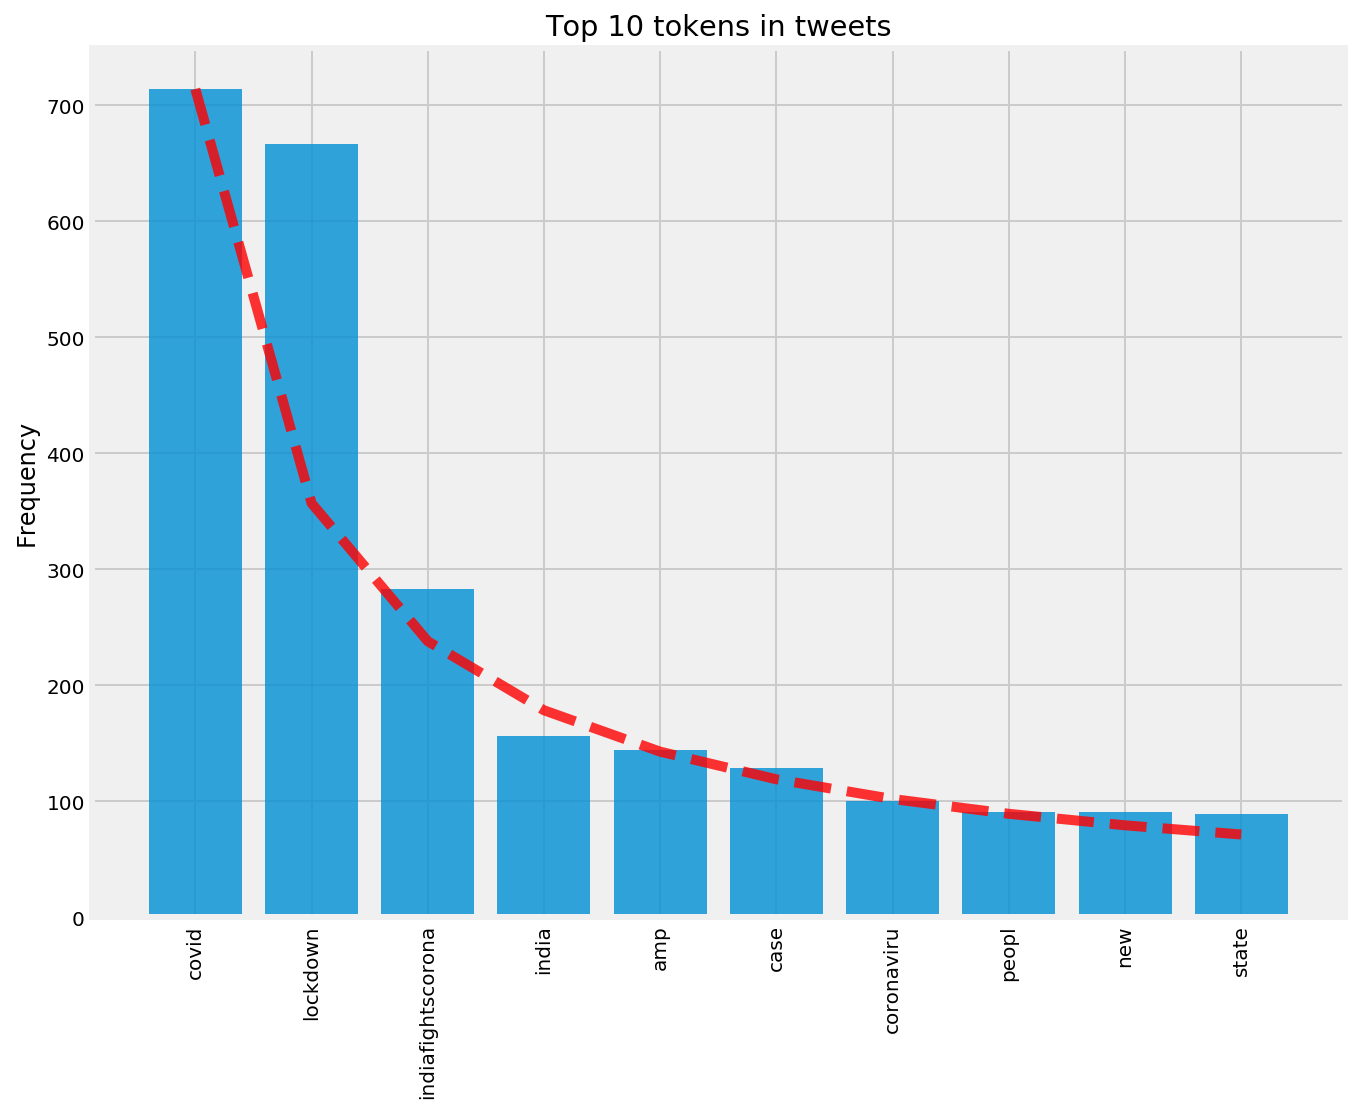

In [465]:
y_pos = np.arange(10)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:10], align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=5,alpha=0.8)
plt.ylabel('Frequency')
plt.title('Top 10 tokens in tweets')

plt.xticks(y_pos, term_freq_df2.sort_values(by='total', ascending=False)['total'][:10].index,rotation='vertical')


Tweet Token Visualization

In [440]:
term_freq_df2 = pd.read_csv('term_freq_df.csv',index_col=0, encoding='utf_8')


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

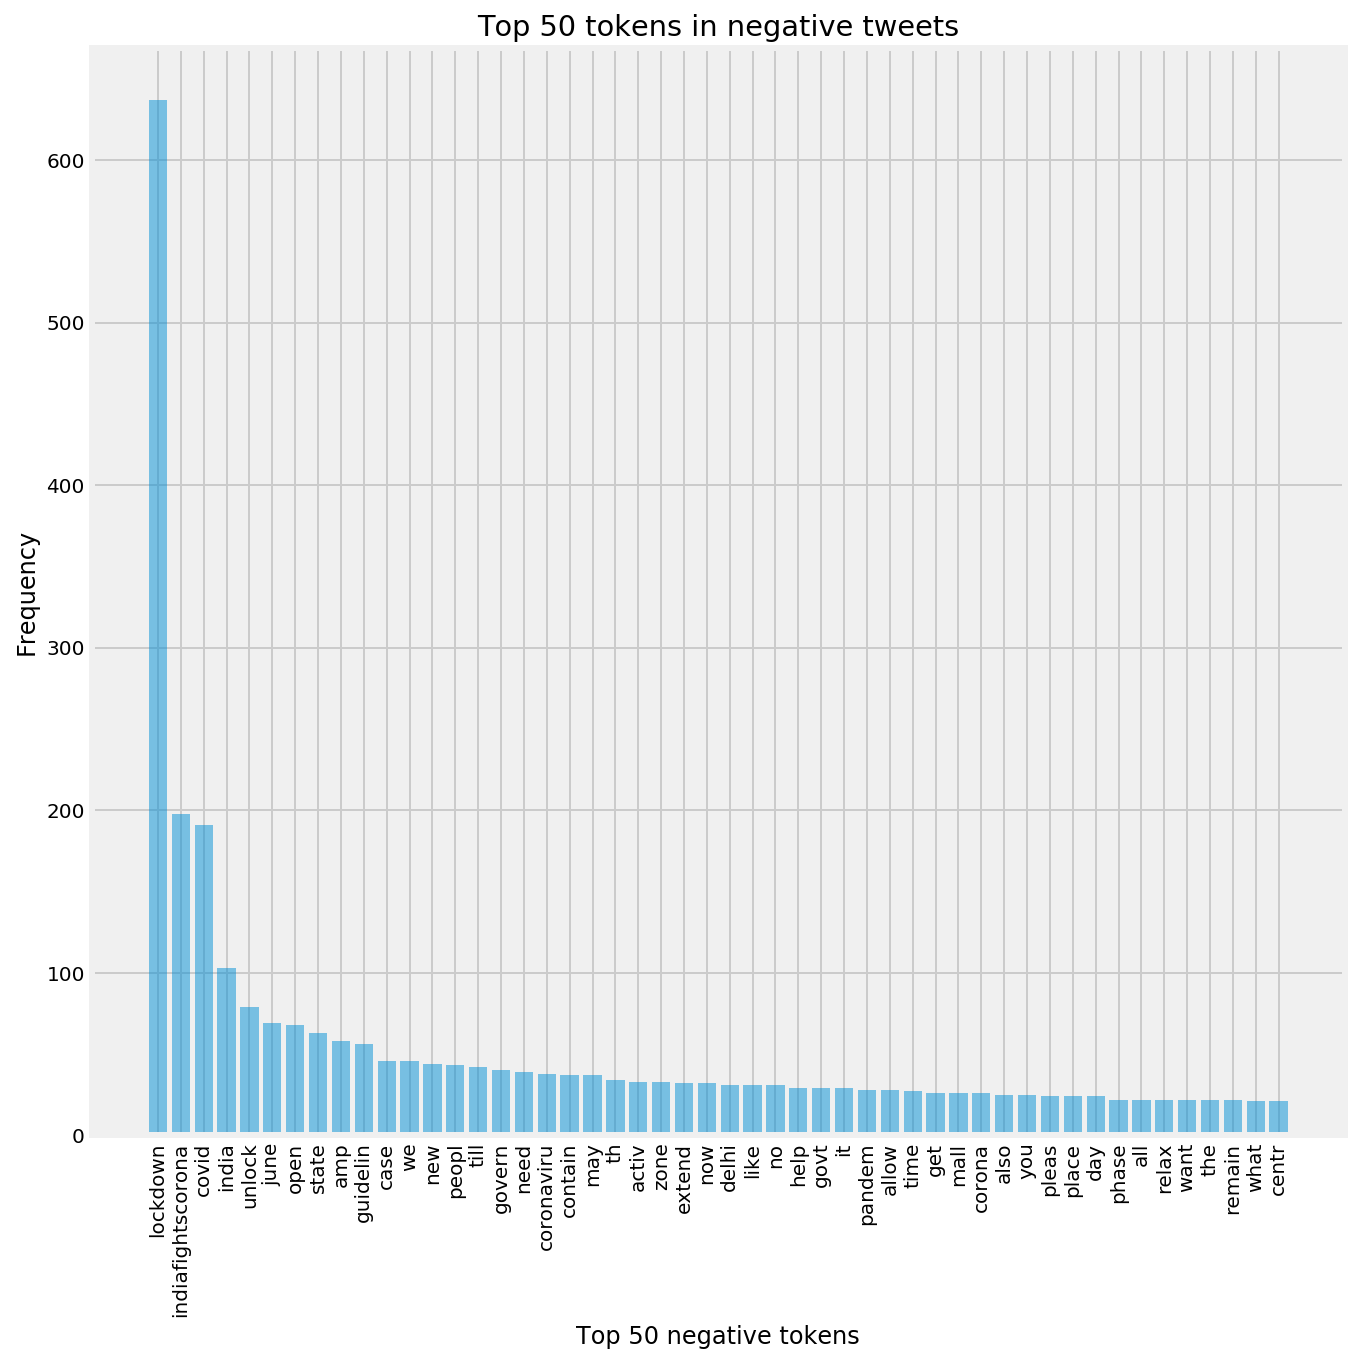

In [441]:
y_pos = np.arange(50)
plt.figure(figsize=(10,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

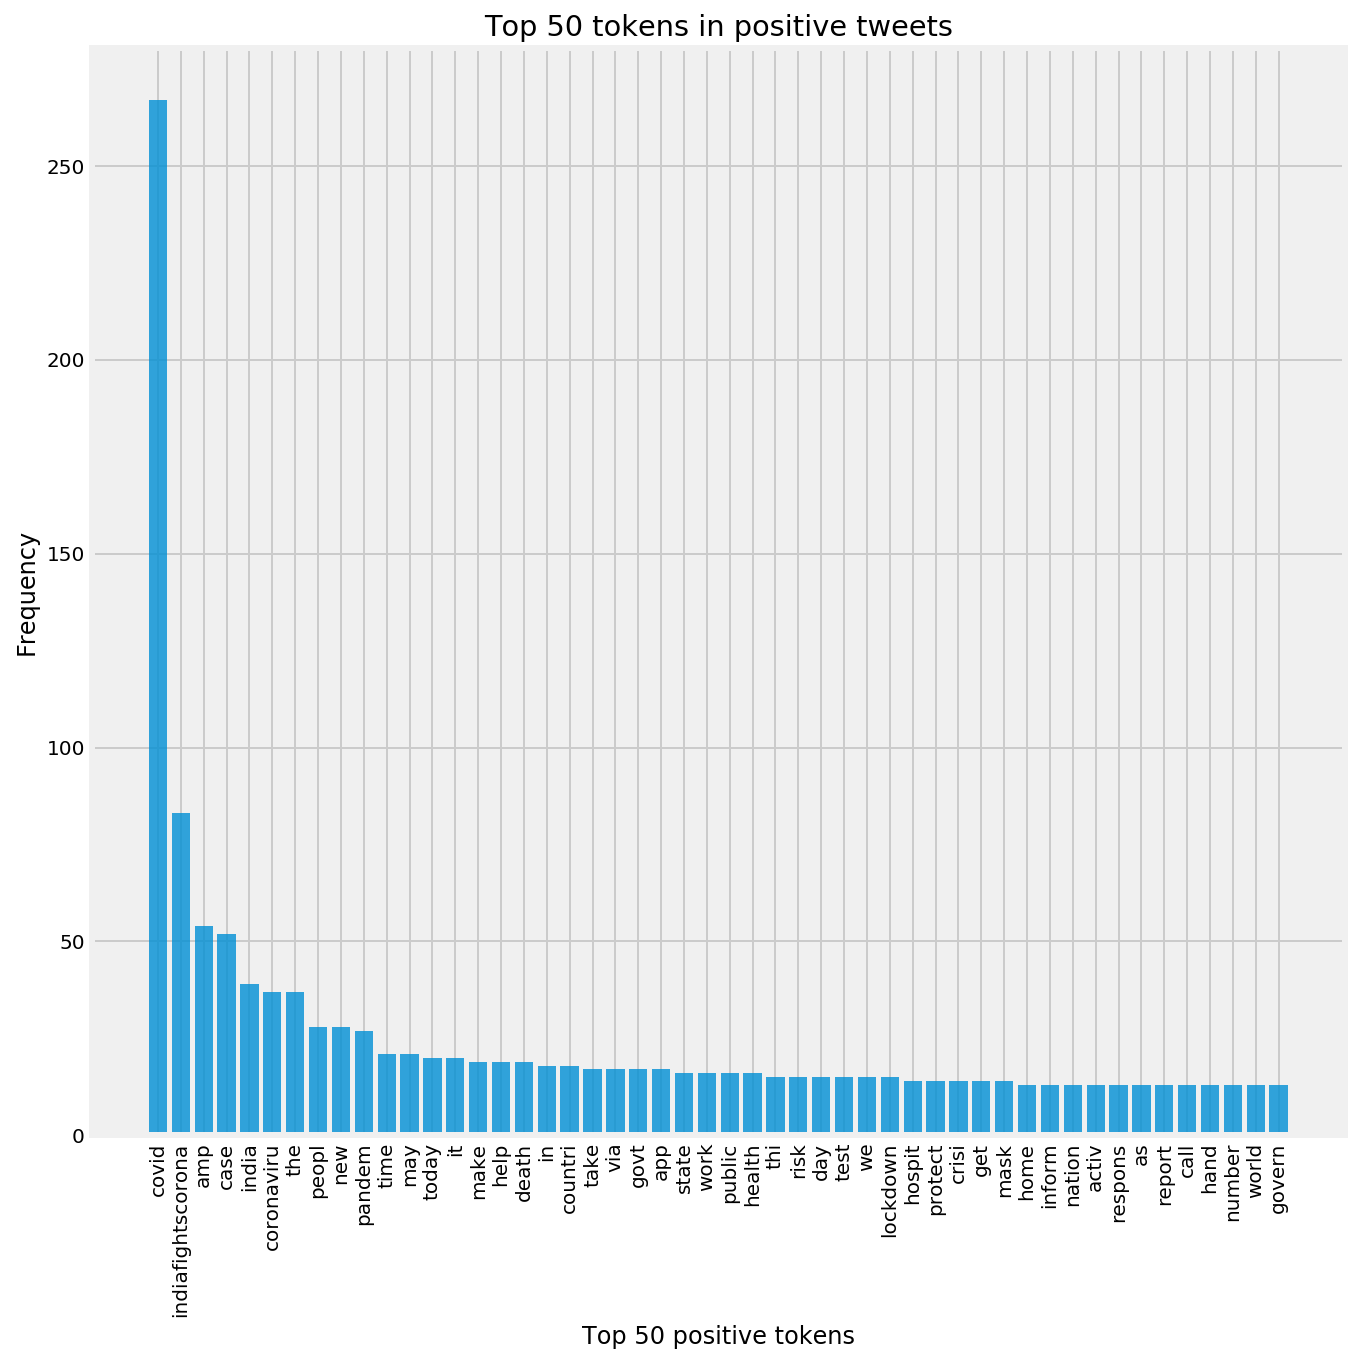

In [442]:
y_pos = np.arange(50)
plt.figure(figsize=(10,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.8)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Top 50 tokens in Neutral tweets')

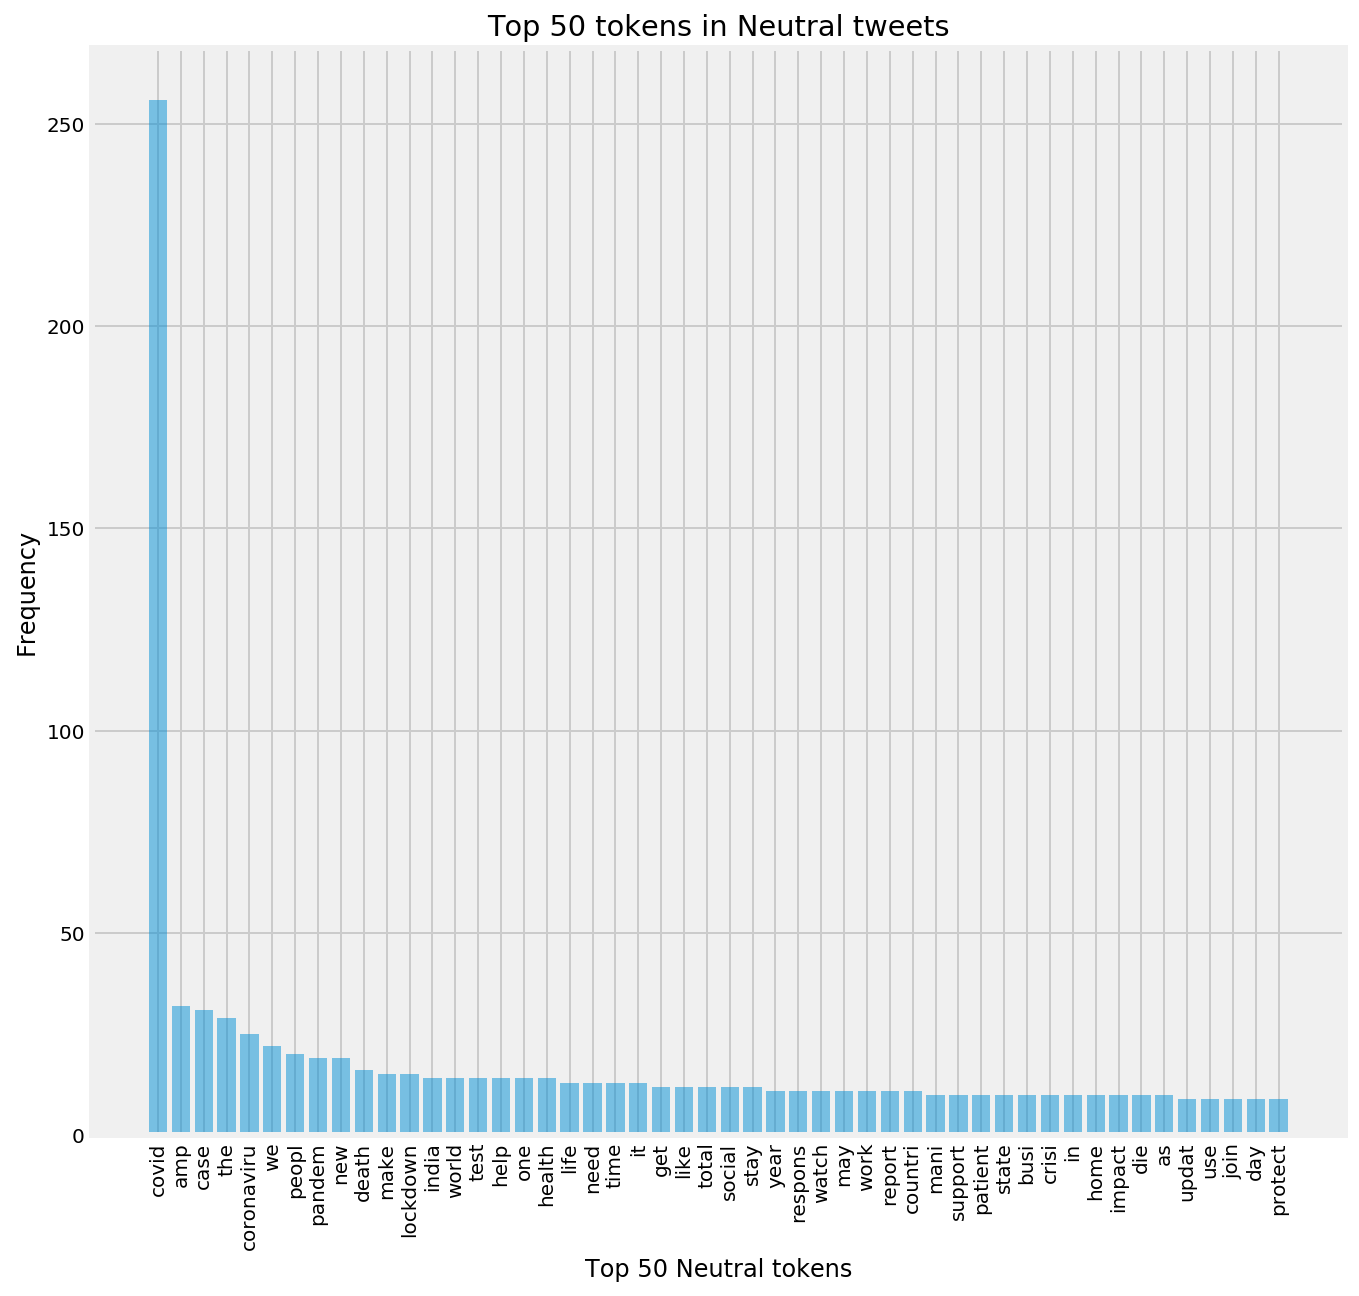

In [443]:
y_neu = np.arange(50)
plt.figure(figsize=(10,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='neutral', ascending=False)['neutral'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='neutral', ascending=False)['neutral'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 Neutral tokens')
plt.title('Top 50 tokens in Neutral tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

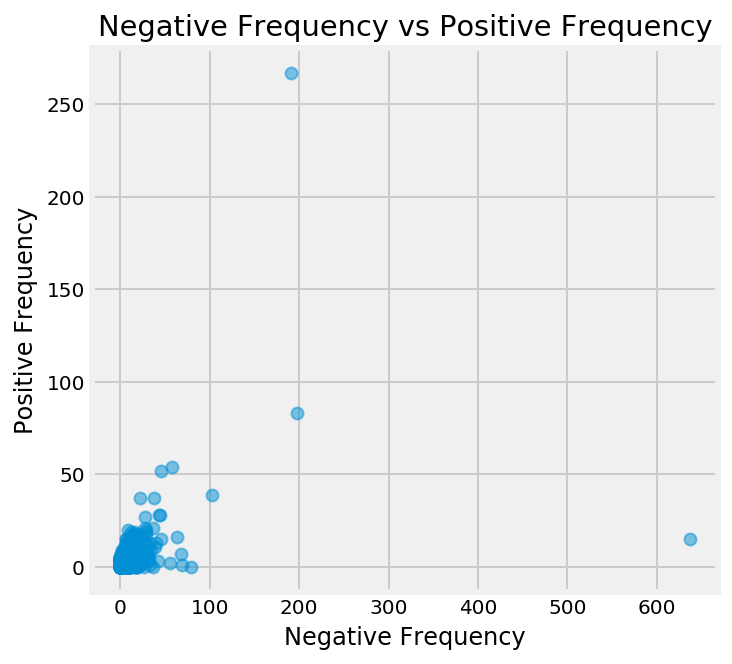

In [444]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')

plt.title('Negative Frequency vs Positive Frequency')

Text(0.5, 1.0, 'Neutral Frequency vs Positive Frequency')

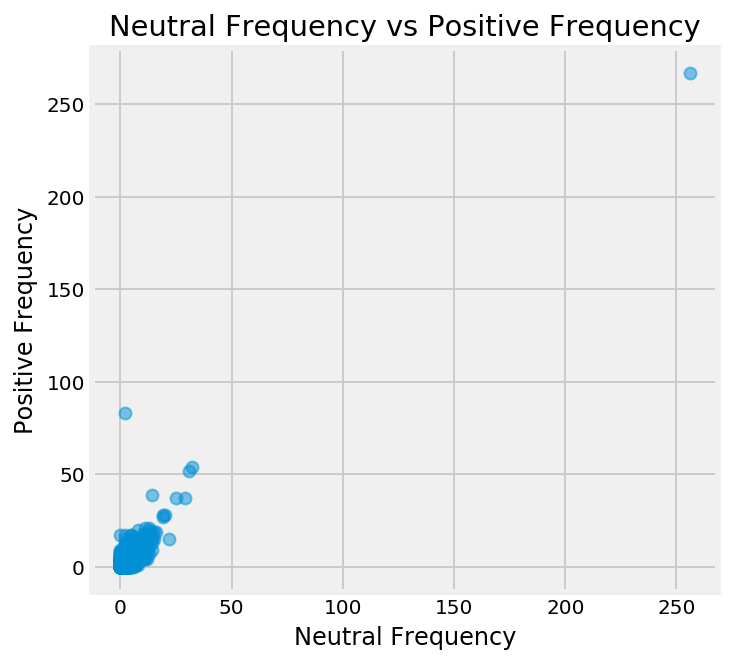

In [445]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.regplot(x="neutral", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Neutral Frequency')

plt.title('Neutral Frequency vs Positive Frequency')

Text(0.5, 1.0, 'Negative Frequency vs Neutral Frequency')

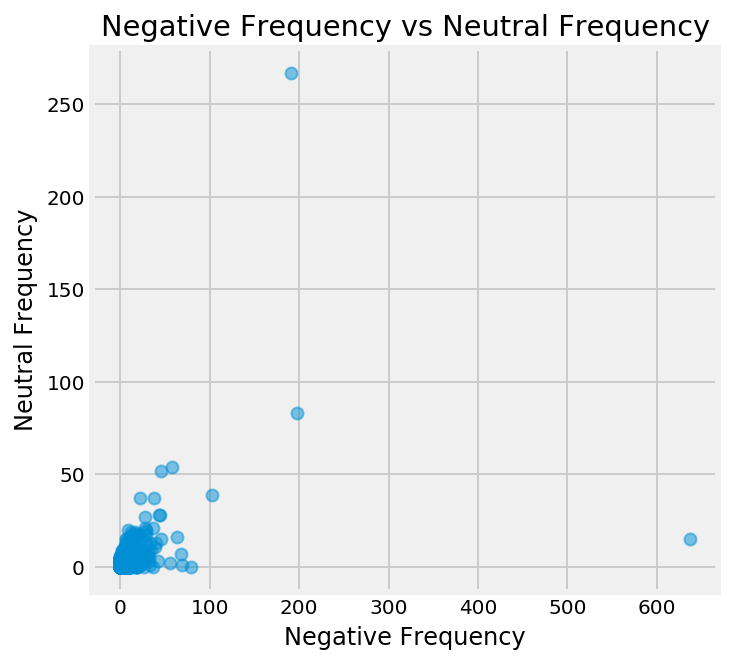

In [446]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Neutral Frequency')
plt.xlabel('Negative Frequency')

plt.title('Negative Frequency vs Neutral Frequency')

In [447]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.positive), high=max(term_freq_df2.positive))
p = figure(x_axis_label='positive', y_axis_label='negative')
p.circle('negative','positive',size=2,alpha=0.8,source=term_freq_df2,color={'field': 'positive', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

Reference--https://github.com/tthustla/twitter_sentiment_analysis_part3/blob/master/Capstone_part3-Copy2.ipynb

Train /  Test Split


In [448]:
x = my_df.full_text
y = my_df.sent_score

In [449]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [450]:
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1713 entries with 13.25% negative, 54.17% positive
Validation set has total 17 entries with 5.88% negative, 35.29% positive
Test set has total 18 entries with 5.56% negative, 55.56% positive


BaseLine-Zero Rule

In [451]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [452]:

%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

Wall time: 47 ms


In [453]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,-1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative','neutral'],
                         columns=['predicted_positive','predicted_negative','predicted_neutral'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 35.29%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative  predicted_neutral
positive                   6                   0                  0
negative                   5                   0                  5
neutral                    1                   0                  0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        10
           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         6

    accuracy                           0.35        17
   macro avg       0.17      0.33      0.22        17
weighted avg       0.18      0.35      0.24        17



C:\Users\TEMP.DESKTOP-8R6RI8B.000\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Extraction-Count Vectorizer

In [454]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [455]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print( "null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))

In [456]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(100,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [466]:
csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,neutral,total
covid,191,267,256,714
lockdown,637,15,15,667
indiafightscorona,198,83,2,283
india,103,39,14,156
amp,58,54,32,144
case,46,52,31,129
coronaviru,38,37,25,100
peopl,43,28,20,91
new,44,28,19,91
state,63,16,10,89


In [467]:
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [468]:

def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[-1,1,0]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive','neutral'],
                         columns=['predicted_negative','predicted_positive','predicted_neutral'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive','neutral'])
          )

UNIGRAM

In [469]:
%%time
ug_cvec = CountVectorizer(max_features=80000)
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 94.12%
accuracy score: 58.82%
model is 35.29% less accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive  predicted_neutral
negative                   5                   4                  1
positive                   1                   5                  0
neutral                    0                   1                  0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.83      0.50      0.62        10
    positive       0.00      0.00      0.00         1
     neutral       0.50      0.83      0.62         6

    accuracy                           0.59        17
   macro avg       0.44      0.44      0.42        17
weighted avg       0.67      0.59      0.59        17

Wall time: 499 ms


BIGRAM

In [470]:
%%time
bg_cvec = CountVectorizer(max_features=70000,ngram_range=(1, 2))
bg_pipeline = Pipeline([
        ('vectorizer', bg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(bg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 94.12%
accuracy score: 47.06%
model is 47.06% less accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive  predicted_neutral
negative                   3                   7                  0
positive                   1                   5                  0
neutral                    0                   1                  0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.75      0.30      0.43        10
    positive       0.00      0.00      0.00         1
     neutral       0.38      0.83      0.53         6

    accuracy                           0.47        17
   macro avg       0.38      0.38      0.32        17
weighted avg       0.58      0.47      0.44        17

Wall time: 963 ms


C:\Users\TEMP.DESKTOP-8R6RI8B.000\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRIGRAM

In [471]:

%%time
tg_cvec = CountVectorizer(max_features=80000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 94.12%
accuracy score: 41.18%
model is 52.94% less accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive  predicted_neutral
negative                   2                   8                  0
positive                   1                   5                  0
neutral                    0                   1                  0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.67      0.20      0.31        10
    positive       0.00      0.00      0.00         1
     neutral       0.36      0.83      0.50         6

    accuracy                           0.41        17
   macro avg       0.34      0.34      0.27        17
weighted avg       0.52      0.41      0.36        17

Wall time: 1.38 s


C:\Users\TEMP.DESKTOP-8R6RI8B.000\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rference--https://github.com/tthustla/twitter_sentiment_analysis_part4/blob/master/Capstone_part4-Copy2.ipynb